In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
ROBOFLOW_WORKSPACE = "unsignedarduino-9db8i"  # @param {"type":"string"}
ROBOFLOW_PROJECT = "chessbot-pieces-qxp5p"  # @param {"type":"string"}
DATASET_VERSION = 2  # @param {"type":"integer","placeholder":"1, 2, 3..."}

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key=userdata.get("ROBOFLOW_API_KEY"))
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
version = project.version(DATASET_VERSION)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chessbot-Pieces-2 in folder:: 100%|██████████| 785/785 [00:00<00:00, 11499.43it/s]


In [4]:
from pathlib import Path
from ultralytics import YOLO

model = YOLO("yolo11n-cls.pt")

dset_path = Path(dataset.location)

results = model.train(data=dset_path, epochs=100, imgsz=64, plots=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 90.9MB/s]


Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/Chessbot-Pieces-2, epochs=100, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.9MB/s]


AMP: checks passed ✅


train: Scanning /content/Chessbot-Pieces-2/train... 648 images, 0 corrupt: 100%|██████████| 648/648 [00:00<00:00, 3899.42it/s]

train: New cache created: /content/Chessbot-Pieces-2/train.cache



val: Scanning /content/Chessbot-Pieces-2/test... 30 images, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 2062.81it/s]

val: New cache created: /content/Chessbot-Pieces-2/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.153G      2.931         16         64:  15%|█▍        | 6/41 [00:01<00:05,  6.31it/s]

      1/100     0.153G      2.927         16         64:  39%|███▉      | 16/41 [00:02<00:02, 10.32it/s]
100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]
      1/100     0.153G      2.761          8         64: 100%|██████████| 41/41 [00:04<00:00,  8.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all      0.167        0.4



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.145G      2.032          8         64: 100%|██████████| 41/41 [00:02<00:00, 16.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.78it/s]


                   all      0.267        0.7

      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.145G      1.334          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.81it/s]

                   all      0.633      0.733



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.145G      0.948          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 59.91it/s]

                   all      0.667        0.8



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.145G     0.7417          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 66.34it/s]

                   all      0.733        0.8



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.145G     0.6413          8         64: 100%|██████████| 41/41 [00:02<00:00, 13.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 64.15it/s]

                   all      0.633        0.8



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.145G     0.6384          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.32it/s]

                   all      0.733        0.8



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.145G     0.6076          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 55.90it/s]

                   all      0.767      0.767



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.145G     0.5438          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.11it/s]

                   all      0.733        0.8



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.145G     0.4748          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 56.42it/s]

                   all      0.733        0.8



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.145G     0.4972          8         64: 100%|██████████| 41/41 [00:02<00:00, 16.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.15it/s]

                   all      0.733      0.833



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.145G      0.495          8         64: 100%|██████████| 41/41 [00:03<00:00, 11.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.47it/s]

                   all      0.733        0.8



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.145G     0.5227          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.44it/s]

                   all      0.733        0.8



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.145G     0.4953          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 55.50it/s]

                   all      0.733      0.733



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.145G     0.4491          8         64: 100%|██████████| 41/41 [00:02<00:00, 20.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 59.60it/s]

                   all        0.7        0.8



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.145G     0.4474          8         64: 100%|██████████| 41/41 [00:02<00:00, 20.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 59.55it/s]

                   all      0.733      0.833



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.145G     0.3843          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.75it/s]

                   all      0.733      0.833



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.145G     0.3919          8         64: 100%|██████████| 41/41 [00:02<00:00, 16.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 60.97it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.145G     0.3616          8         64: 100%|██████████| 41/41 [00:02<00:00, 20.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 56.64it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.145G     0.4113          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.53it/s]

                   all      0.733      0.833



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.145G     0.3846          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 58.45it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.145G     0.4181          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.08it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.145G     0.3552          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.83it/s]

                   all      0.733      0.867



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.145G     0.2907          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.71it/s]

                   all      0.767        0.9



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.145G     0.3645          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.82it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.145G     0.3033          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.54it/s]

                   all      0.733      0.867



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.145G     0.3662          8         64: 100%|██████████| 41/41 [00:02<00:00, 15.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.60it/s]

                   all      0.767        0.9



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.145G     0.3589          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.27it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.145G     0.3245          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.12it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.145G     0.3007          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.58it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.145G     0.3214          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 59.91it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.145G     0.3469          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.39it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.145G     0.2889          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 42.97it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.145G     0.2524          8         64: 100%|██████████| 41/41 [00:02<00:00, 14.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.92it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.145G     0.2427          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.47it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.145G     0.3303          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.99it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.145G     0.2167          8         64: 100%|██████████| 41/41 [00:02<00:00, 20.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.12it/s]


                   all      0.767        0.8

      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.145G     0.2373          8         64: 100%|██████████| 41/41 [00:02<00:00, 14.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.24it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.145G     0.2306          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 58.81it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.145G     0.2348          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 55.50it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.145G     0.2188          8         64: 100%|██████████| 41/41 [00:02<00:00, 20.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.90it/s]

                   all      0.767      0.767



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.145G     0.2715          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.47it/s]

                   all      0.767      0.767



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.145G     0.2433          8         64: 100%|██████████| 41/41 [00:02<00:00, 17.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.76it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.145G     0.1958          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 24.06it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.145G     0.2307          8         64: 100%|██████████| 41/41 [00:02<00:00, 17.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 49.01it/s]

                   all      0.767      0.767



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.145G     0.2411          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.06it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.145G     0.2407          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 56.23it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.145G     0.2123          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.30it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.145G     0.2363          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 27.71it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.145G     0.1694          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 34.89it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.145G     0.1894          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.74it/s]

                   all      0.767        0.9



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.145G      0.214          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 57.76it/s]

                   all      0.767        0.9



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.145G     0.2222          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.75it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.145G     0.1744          8         64: 100%|██████████| 41/41 [00:02<00:00, 14.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.37it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.145G     0.2229          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 60.74it/s]

                   all      0.767        0.9



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.145G     0.2299          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 55.91it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.145G     0.2457          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 49.36it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.145G     0.1803          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.34it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.145G     0.1872          8         64: 100%|██████████| 41/41 [00:02<00:00, 15.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.01it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.145G     0.1894          8         64: 100%|██████████| 41/41 [00:03<00:00, 11.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.93it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.145G     0.2028          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 44.99it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.145G     0.1916          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.07it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.145G     0.1853          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.85it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.145G     0.1649          8         64: 100%|██████████| 41/41 [00:02<00:00, 17.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 38.35it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.145G     0.1923          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.12it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.145G     0.2567          8         64: 100%|██████████| 41/41 [00:02<00:00, 15.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 58.28it/s]

                   all      0.767        0.9



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.145G     0.1878          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 53.82it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.145G     0.1693          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 40.10it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.145G     0.1689          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 56.52it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.145G     0.1365          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.16it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.145G     0.1376          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.16it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.145G     0.1706          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 49.86it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.145G     0.1468          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 63.17it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.145G     0.1385          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 56.20it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.145G     0.1885          8         64: 100%|██████████| 41/41 [00:02<00:00, 16.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.50it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.145G     0.1358          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 21.26it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.145G     0.1374          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.67it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.145G     0.1351          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 61.77it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.145G     0.1618          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 56.69it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.145G     0.1122          8         64: 100%|██████████| 41/41 [00:02<00:00, 16.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 64.41it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.145G     0.1642          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.04it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.145G    0.09934          8         64: 100%|██████████| 41/41 [00:02<00:00, 16.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.97it/s]

                   all      0.767      0.867



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.145G     0.1249          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.08it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.145G     0.1364          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.65it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.145G     0.1303          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.92it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.145G     0.1371          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 59.75it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.145G     0.1795          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 60.33it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.145G     0.1195          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.79it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.145G     0.1594          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 58.93it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.145G     0.1294          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.08it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.145G     0.1362          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 22.51it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.145G     0.1124          8         64: 100%|██████████| 41/41 [00:03<00:00, 13.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.17it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.145G     0.1105          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.95it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.145G    0.09898          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 60.18it/s]


                   all      0.767        0.8

      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.145G     0.1228          8         64: 100%|██████████| 41/41 [00:02<00:00, 17.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.93it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.145G     0.1304          8         64: 100%|██████████| 41/41 [00:02<00:00, 14.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 32.92it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.145G    0.09397          8         64: 100%|██████████| 41/41 [00:03<00:00, 12.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.73it/s]

                   all      0.767        0.8



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.145G     0.1241          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.97it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.145G     0.1081          8         64: 100%|██████████| 41/41 [00:02<00:00, 19.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 59.17it/s]

                   all      0.767      0.833



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.145G      0.109          8         64: 100%|██████████| 41/41 [00:02<00:00, 18.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 49.72it/s]

                   all      0.767      0.833



100 epochs completed in 0.084 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,543,958 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Chessbot-Pieces-2/train... found 648 images in 14 classes ✅ 
val: None...
test: /content/Chessbot-Pieces-2/test... found 30 images in 12 classes: ERROR ❌️ requires 14 classes, not 12


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.79it/s]


                   all      0.767        0.9
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


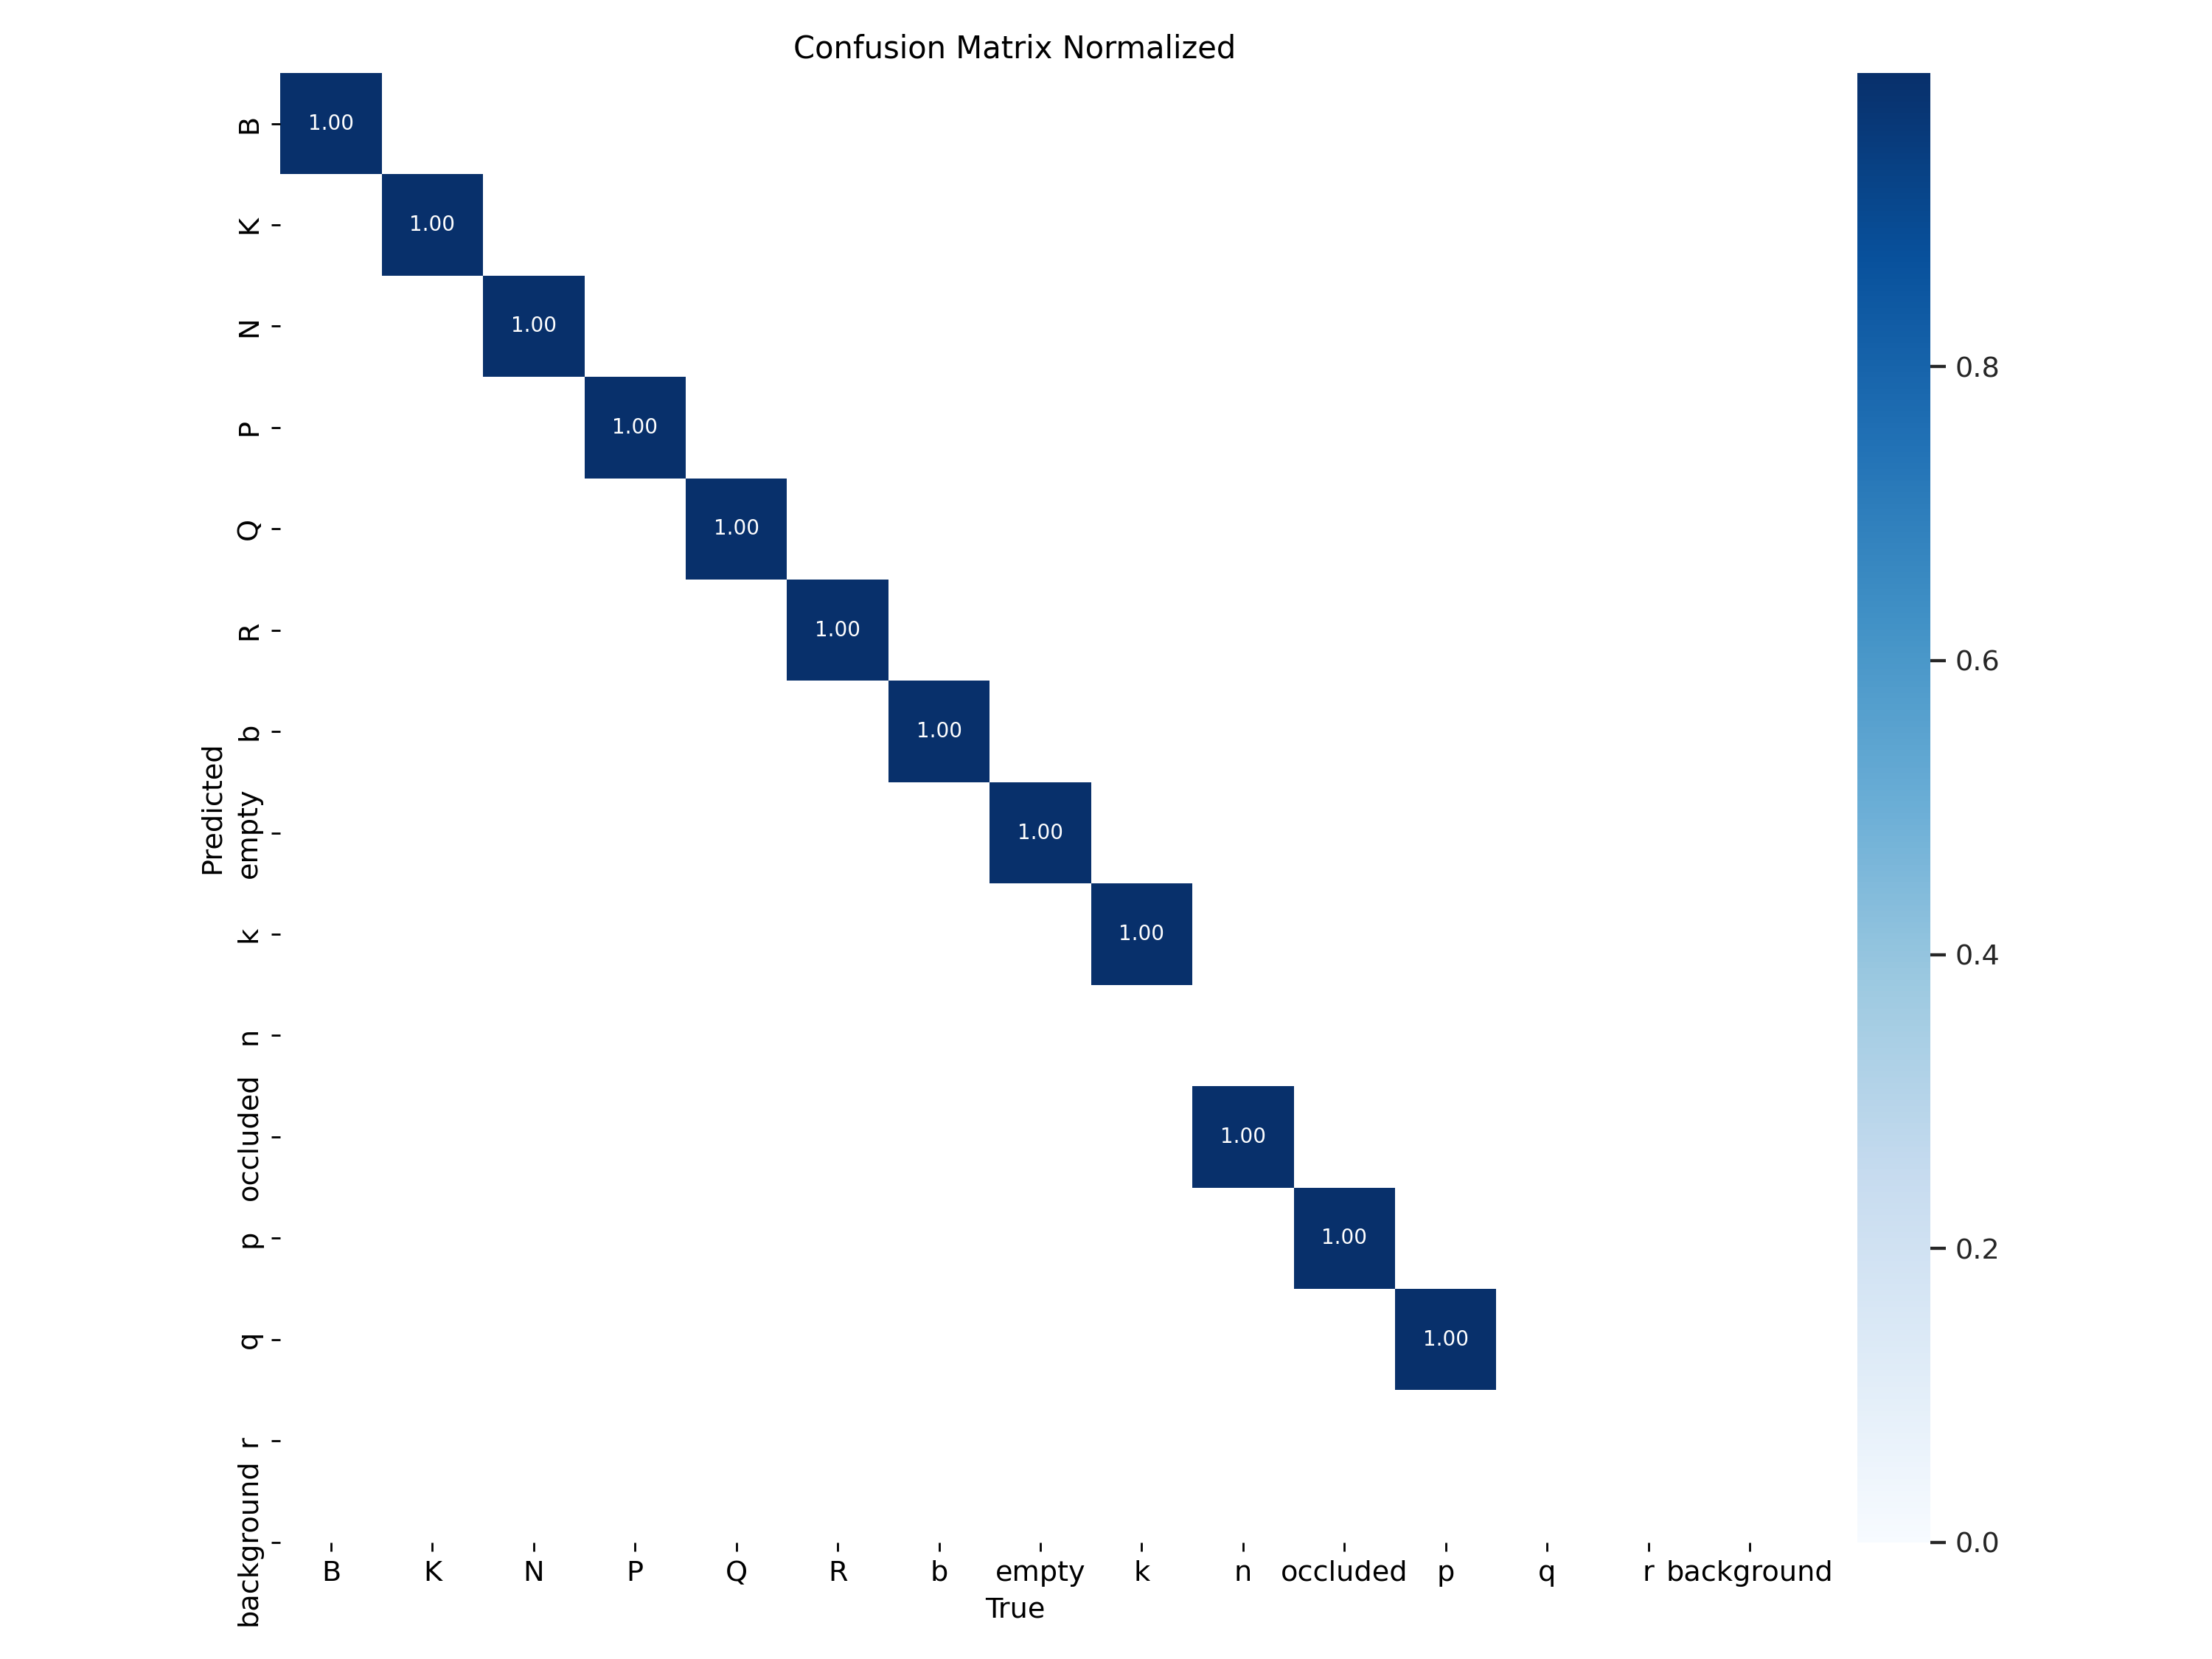

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/classify/train/confusion_matrix_normalized.png', width=600)

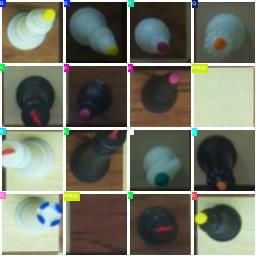

In [6]:
IPyImage(filename=f'runs/classify/train/val_batch0_pred.jpg', width=600)

In [7]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"runs/classify/train")

View the status of your deployment at: https://app.roboflow.com/unsignedarduino-9db8i/chessbot-pieces-qxp5p/2
Share your model with the world at: https://universe.roboflow.com/unsignedarduino-9db8i/chessbot-pieces-qxp5p/model/2
